Initial Bond Price: 0.8886597927014092
95% VaR: 0.14626731185293912


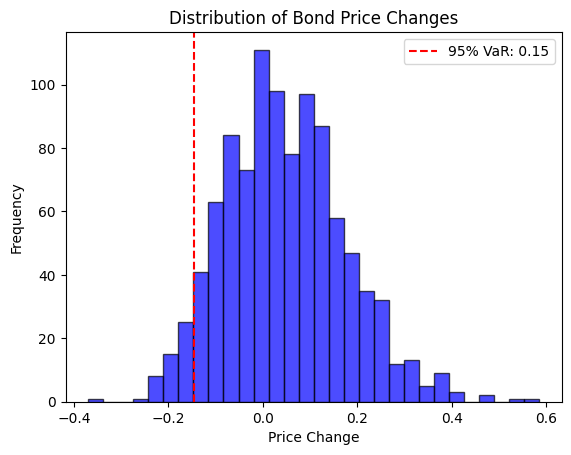

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hull-White Model Parameters
a = 0.1       # Speed of mean reversion
sigma = 0.02  # Volatility of short rate
r0 = 0.03     # Initial short rate
T = 5         # Maturity of the bond (years)
dt = 1 / 252  # Daily time increment (assuming 252 trading days in a year)
steps = int(T / dt)  # Number of time steps
n_simulations = 1000  # Number of Monte Carlo simulations

# Function to simulate short rates under Hull-White model
def simulate_hull_white(a, sigma, r0, T, dt, steps, n_simulations):
    rates = np.zeros((steps, n_simulations))
    rates[0, :] = r0
    for t in range(1, steps):
        dW = np.random.normal(0, np.sqrt(dt), n_simulations)
        rates[t, :] = rates[t - 1, :] * np.exp(-a * dt) + sigma * dW
    return rates

# Function to calculate bond prices
def bond_price(a, sigma, r, T, t):
    B_t_T = (1 - np.exp(-a * (T - t))) / a
    A_t_T = np.exp(-0.5 * (sigma**2 / a**2) * (1 - np.exp(-2 * a * t)) * B_t_T**2)
    return A_t_T * np.exp(-B_t_T * r)

# Simulate short rates
short_rates = simulate_hull_white(a, sigma, r0, T, dt, steps, n_simulations)

# Calculate bond prices at each simulation endpoint
final_rates = short_rates[-1, :]  # Use the rates at maturity
bond_prices = bond_price(a, sigma, final_rates, T, 0)

# Calculate price changes relative to the initial bond price
initial_price = bond_price(a, sigma, r0, T, 0)
price_changes = bond_prices - initial_price

# Calculate 95% VaR
VaR_95 = np.percentile(price_changes, 5)  # 5th percentile of losses

# Display results
print("Initial Bond Price:", initial_price)
print("95% VaR:", -VaR_95)

# Plot histogram of price changes
plt.hist(price_changes, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(VaR_95, color='red', linestyle='--', label=f"95% VaR: {-VaR_95:.2f}")
plt.title("Distribution of Bond Price Changes")
plt.xlabel("Price Change")
plt.ylabel("Frequency")
plt.legend()
plt.show()
